# 🚀 Learning Sensor Data Analysis from Scratch
## A Beginner's Journey with UCI HAR Dataset

Welcome to your sensor data learning journey! This notebook is designed for someone completely new to sensor data analysis.

### What You'll Learn:
- **What sensor data actually is** and how it differs from traditional datasets
- **How to think about time-series data** with multiple sensors
- **Step-by-step feature engineering** from raw sensor signals
- **Building your first sensor-based classifier**
- **Understanding the BFRB detection challenge**

### Your Current Knowledge:
✅ You know basic ML: X features, y target, train/test splits  
✅ You understand classification problems  
❓ You're new to sensor data, time-series, and feature engineering  

### What Makes Sensor Data Different:
Unlike traditional datasets with neat columns and rows, sensor data is:
- **Continuous streams** of measurements over time
- **Multi-dimensional** (multiple sensors measuring different things)
- **Noisy** and requires preprocessing
- **Sequential** - the order matters!

Let's start exploring! 🔍

# 📁 Section 1: Setup and Initial Data Loading

## 🤔 First Questions to Ask About Any Dataset:
When you encounter a new dataset, especially sensor data, ask these questions:

1. **What files are included?** - Each file has a purpose
2. **What's the data structure?** - How is it organized?
3. **What's the timeline?** - When and how was data collected?
4. **Who are the subjects?** - How many people, what did they do?
5. **What sensors were used?** - What do they measure?

Let's explore the UCI HAR dataset files and understand what each one contains.

In [1]:
# Let's import the basic libraries we'll need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set up the dataset path
dataset_path = r"d:\Datasets\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset"

# Let's start by exploring what files we have
print("📂 Files in the dataset:")
dataset_dir = Path(dataset_path)
for file in dataset_dir.iterdir():
    print(f"  {file.name}")
    
# TODO: Run this cell and examine the files
# Question for you: What do you think each file contains based on its name?

📂 Files in the dataset:
  .DS_Store
  activity_labels.txt
  features.txt
  features_info.txt
  README.txt
  test
  train


## 🔍 Exercise 1: Examine the README
Before looking at data, always read the documentation! Let's examine the README file to understand what this dataset is about.

**Your task:** Read the README.txt file and answer these questions:
1. What activities were people doing?
2. What sensors were used?
3. How many people participated?
4. What's the sampling rate?
5. How long was each activity recorded?

**Hint:** You can use the `read_file` function or open the file in a text editor.

In [3]:
# Let's start by looking at the activity labels - these are our target classes
print("🎯 Activity Labels (our target classes):")
activity_labels = pd.read_csv(dataset_path + "/activity_labels.txt", sep=' ', header=None, names=['id', 'activity'])
print(activity_labels)

print("\n" + "="*50)

# Now let's look at the feature list - these are our X variables
print("📊 Feature List (first 10 features):")
features = pd.read_csv(dataset_path + "/features.txt", sep=' ', header=None, names=['id', 'feature'])
print(features.head(10))
print(f"\nTotal features: {len(features)}")

# TODO: Run this cell and examine the outputs
# Question: How many activities are there? What are they?
# Question: How many features are there? What do you notice about their names?

🎯 Activity Labels (our target classes):
   id            activity
0   1             WALKING
1   2    WALKING_UPSTAIRS
2   3  WALKING_DOWNSTAIRS
3   4             SITTING
4   5            STANDING
5   6              LAYING

📊 Feature List (first 10 features):
   id            feature
0   1  tBodyAcc-mean()-X
1   2  tBodyAcc-mean()-Y
2   3  tBodyAcc-mean()-Z
3   4   tBodyAcc-std()-X
4   5   tBodyAcc-std()-Y
5   6   tBodyAcc-std()-Z
6   7   tBodyAcc-mad()-X
7   8   tBodyAcc-mad()-Y
8   9   tBodyAcc-mad()-Z
9  10   tBodyAcc-max()-X

Total features: 561


# 🏗️ Section 2: Understanding Dataset Structure

## 💭 Key Concept: How Sensor Data is Organized

In traditional datasets, you have:
- **Rows**: Individual samples/records
- **Columns**: Features/attributes
- **Target**: What you want to predict

In sensor data, it's more complex:
- **Subjects**: Different people (like different customers)
- **Activities**: What each person was doing (like different behaviors)
- **Time Windows**: Small segments of continuous sensor data
- **Features**: Mathematical summaries of each time window

## 🔍 The UCI HAR Structure:
```
Subject 1 -> Activity 1 -> Time Window 1 -> 561 features
Subject 1 -> Activity 1 -> Time Window 2 -> 561 features
Subject 1 -> Activity 2 -> Time Window 1 -> 561 features
...
Subject 30 -> Activity 6 -> Time Window N -> 561 features
```

Let's explore this structure!

In [4]:
# Let's load the training data and examine its structure
print("📊 Loading training data...")

# Load the main training features (X)
X_train = pd.read_csv(dataset_path + "/train/X_train.txt", sep=r'\s+', header=None)
print(f"X_train shape: {X_train.shape}")
print(f"This means: {X_train.shape[0]} samples, {X_train.shape[1]} features")

# Load the training labels (y)
y_train = pd.read_csv(dataset_path + "/train/y_train.txt", header=None, names=['activity'])
print(f"y_train shape: {y_train.shape}")

# Load the subject information
subject_train = pd.read_csv(dataset_path + "/train/subject_train.txt", header=None, names=['subject'])
print(f"subject_train shape: {subject_train.shape}")

print("\n" + "="*30)
print("🤔 Let's think about this...")
print("- Each row in X_train represents one 'time window' of sensor data")
print("- Each row in y_train tells us what activity was happening in that window")
print("- Each row in subject_train tells us which person was performing the activity")
print("- All three have the same number of rows - they're aligned!")

# TODO: Run this cell and examine the outputs
# Question: How many time windows do we have in the training set?
# Question: How many features describe each time window?

📊 Loading training data...
X_train shape: (7352, 561)
This means: 7352 samples, 561 features
y_train shape: (7352, 1)
subject_train shape: (7352, 1)

🤔 Let's think about this...
- Each row in X_train represents one 'time window' of sensor data
- Each row in y_train tells us what activity was happening in that window
- Each row in subject_train tells us which person was performing the activity
- All three have the same number of rows - they're aligned!
X_train shape: (7352, 561)
This means: 7352 samples, 561 features
y_train shape: (7352, 1)
subject_train shape: (7352, 1)

🤔 Let's think about this...
- Each row in X_train represents one 'time window' of sensor data
- Each row in y_train tells us what activity was happening in that window
- Each row in subject_train tells us which person was performing the activity
- All three have the same number of rows - they're aligned!


In [5]:
# Let's examine the distribution of activities and subjects
print("🏃‍♂️ Activity Distribution in Training Set:")
activity_counts = y_train['activity'].value_counts().sort_index()
for activity_id, count in activity_counts.items():
    activity_name = activity_labels[activity_labels['id'] == activity_id]['activity'].iloc[0]
    print(f"  {activity_id}: {activity_name} - {count} samples")

print(f"\n👥 Subject Distribution:")
subject_counts = subject_train['subject'].value_counts().sort_index()
print(f"Number of unique subjects: {len(subject_counts)}")
print(f"Subjects range from: {subject_counts.index.min()} to {subject_counts.index.max()}")
print(f"Average samples per subject: {subject_counts.mean():.1f}")

# Let's look at a few sample feature values
print(f"\n📊 Sample Feature Values (first 5 features, first 3 samples):")
X_train.columns = features['feature']  # Give meaningful names to columns
print(X_train.iloc[:3, :5])

# TODO: Run this cell and examine the outputs
# Question: Are all activities equally represented? 
# Question: Do all subjects have the same number of samples?
# Question: What do you notice about the feature values? Are they large/small?

🏃‍♂️ Activity Distribution in Training Set:
  1: WALKING - 1226 samples
  2: WALKING_UPSTAIRS - 1073 samples
  3: WALKING_DOWNSTAIRS - 986 samples
  4: SITTING - 1286 samples
  5: STANDING - 1374 samples
  6: LAYING - 1407 samples

👥 Subject Distribution:
Number of unique subjects: 21
Subjects range from: 1 to 30
Average samples per subject: 350.1

📊 Sample Feature Values (first 5 features, first 3 samples):
feature  tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0                 0.288585          -0.020294          -0.132905   
1                 0.278419          -0.016411          -0.123520   
2                 0.279653          -0.019467          -0.113462   

feature  tBodyAcc-std()-X  tBodyAcc-std()-Y  
0               -0.995279         -0.983111  
1               -0.998245         -0.975300  
2               -0.995380         -0.967187  


# 📡 Section 3: Exploring Raw Sensor Signals

## 🤖 Understanding Sensors
Before we dive into features, let's understand what sensors actually measure:

### 📱 Accelerometer:
- **Measures**: Linear acceleration (movement)
- **Units**: g (gravity units, where 1g = 9.8 m/s²)
- **Axes**: X, Y, Z (3 directions)
- **What it tells us**: How fast something is speeding up or slowing down

### 🌀 Gyroscope:
- **Measures**: Angular velocity (rotation)
- **Units**: rad/s (radians per second)
- **Axes**: X, Y, Z (rotation around each axis)
- **What it tells us**: How fast something is spinning

## 🎯 Why This Matters for BFRB Detection:
- **Scratching**: Quick back-and-forth movements (high acceleration)
- **Hair pulling**: Specific rotation patterns (gyroscope)
- **Skin picking**: Fine motor movements (both sensors)

Let's look at some raw sensor data to understand these patterns!

In [6]:
# Let's examine the raw sensor data (this is in the Inertial Signals folder)
print("📊 Raw Sensor Data Files:")
inertial_path = Path(dataset_path + "/train/Inertial Signals")
for file in inertial_path.iterdir():
    print(f"  {file.name}")

print("\n" + "="*50)
print("🔍 Let's load one raw sensor file to understand the structure:")

# Load body acceleration in X direction
body_acc_x = pd.read_csv(inertial_path / "body_acc_x_train.txt", sep=r'\s+', header=None)
print(f"Body acceleration X shape: {body_acc_x.shape}")
print(f"This means: {body_acc_x.shape[0]} samples, {body_acc_x.shape[1]} time points per sample")

print("\n🤔 Understanding the structure:")
print("- Each row represents one 'time window' (same as our X_train)")
print("- Each column represents one time point within that window")
print("- So we have 128 time points per window (about 2.56 seconds at 50Hz)")

# Let's look at a sample of the raw data
print(f"\n📈 Sample raw acceleration data (first 3 windows, first 10 time points):")
print(body_acc_x.iloc[:3, :10])

# TODO: Run this cell and examine the outputs
# Question: How many time points are in each window?
# Question: What do you think the numbers represent?

📊 Raw Sensor Data Files:
  body_acc_x_train.txt
  body_acc_y_train.txt
  body_acc_z_train.txt
  body_gyro_x_train.txt
  body_gyro_y_train.txt
  body_gyro_z_train.txt
  total_acc_x_train.txt
  total_acc_y_train.txt
  total_acc_z_train.txt

🔍 Let's load one raw sensor file to understand the structure:
Body acceleration X shape: (7352, 128)
This means: 7352 samples, 128 time points per sample

🤔 Understanding the structure:
- Each row represents one 'time window' (same as our X_train)
- Each column represents one time point within that window
- So we have 128 time points per window (about 2.56 seconds at 50Hz)

📈 Sample raw acceleration data (first 3 windows, first 10 time points):
          0         1         2         3         4         5         6  \
0  0.000181  0.010139  0.009276  0.005066  0.010810  0.004045  0.004757   
1  0.001094  0.004550  0.002879  0.002247  0.003305  0.002416  0.001619   
2  0.003531  0.002285 -0.000420 -0.003738 -0.006706 -0.003148  0.000733   

          7

📊 Visualizing Raw Sensor Data for Different Activities


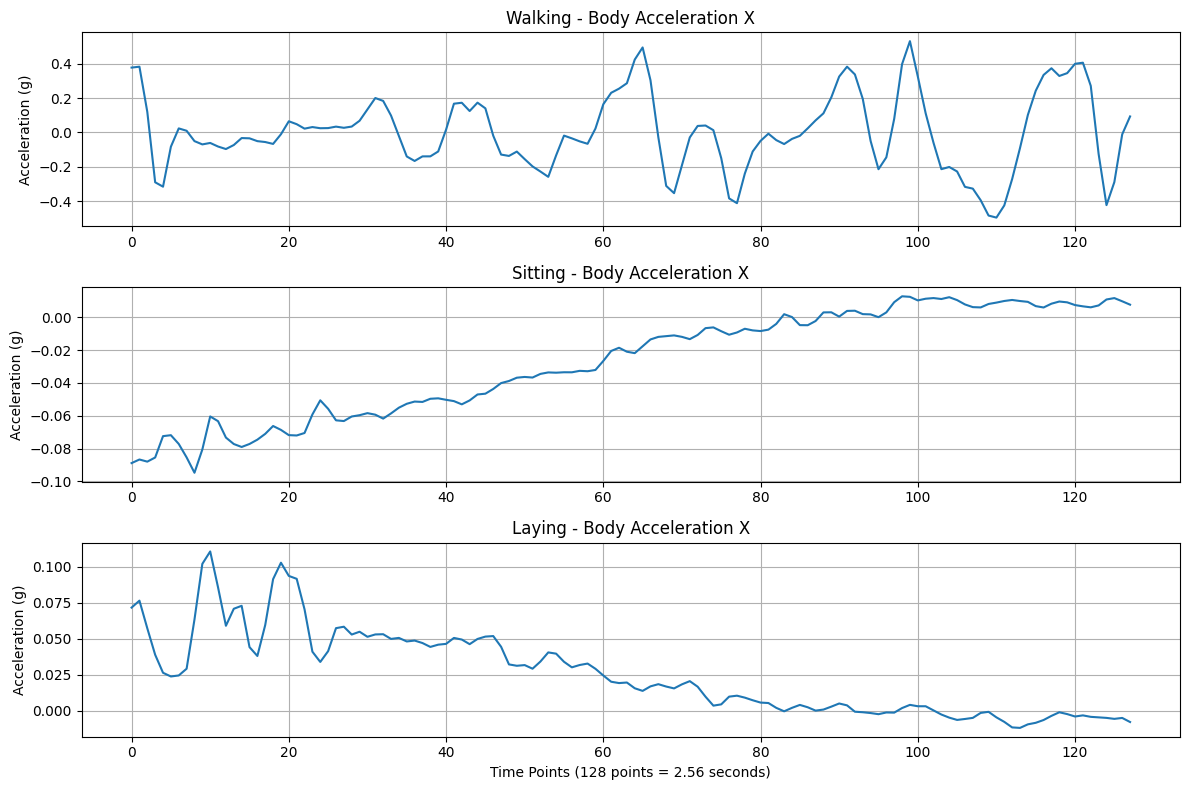

In [7]:
# Let's visualize some raw sensor data to understand patterns
print("📊 Visualizing Raw Sensor Data for Different Activities")

# Get the activity for each sample
activities = y_train['activity'].values

# Let's pick a few samples of different activities to visualize
walking_idx = np.where(activities == 1)[0][0]      # Walking
sitting_idx = np.where(activities == 4)[0][0]      # Sitting
laying_idx = np.where(activities == 6)[0][0]       # Laying

# Create a plot to compare activities
fig, axes = plt.subplots(3, 1, figsize=(12, 8))

# Plot walking
axes[0].plot(body_acc_x.iloc[walking_idx, :])
axes[0].set_title('Walking - Body Acceleration X')
axes[0].set_ylabel('Acceleration (g)')
axes[0].grid(True)

# Plot sitting  
axes[1].plot(body_acc_x.iloc[sitting_idx, :])
axes[1].set_title('Sitting - Body Acceleration X')
axes[1].set_ylabel('Acceleration (g)')
axes[1].grid(True)

# Plot laying
axes[2].plot(body_acc_x.iloc[laying_idx, :])
axes[2].set_title('Laying - Body Acceleration X')
axes[2].set_ylabel('Acceleration (g)')
axes[2].set_xlabel('Time Points (128 points = 2.56 seconds)')
axes[2].grid(True)

plt.tight_layout()
plt.show()

# TODO: Run this cell and examine the plots
# Question: What differences do you see between walking, sitting, and laying?
# Question: Which activity shows the most variation in acceleration?

# 🔧 Section 4: Feature Engineering Concepts

## 💡 The Big Question: How Do We Go From Raw Signals to Features?

You just saw raw sensor data - it's a time series with 128 points per window. But our machine learning models need fixed-size feature vectors. How do we transform this?

## 🧮 Feature Engineering = Summarizing Time Series

Think of it like describing a movie to a friend. Instead of showing every frame, you summarize:
- **"It was action-packed"** (high variance, high energy)
- **"It was slow-paced"** (low variance, low energy)
- **"It had dramatic peaks"** (high maximum values)

Similarly, for sensor data:
- **Raw signal**: 128 time points per window
- **Features**: Mathematical summaries of those 128 points

## 🎯 Types of Features in UCI HAR:

### 📊 **Statistical Features** (Time Domain):
- `mean()` - Average value
- `std()` - How much variation
- `max()` - Peak values
- `min()` - Minimum values

### 🌊 **Frequency Features** (Frequency Domain):
- `fBodyAcc-mean()-X` - Average frequency content
- `fBodyAcc-energy()-X` - Energy in frequency domain

### 🔄 **Derived Features**:
- `Jerk` - Rate of change of acceleration (sudden movements)
- `Magnitude` - Combined X+Y+Z into single value

Let's explore how these features are created!

In [8]:
# Let's manually create some features from raw sensor data to understand the process
print("🔧 Creating Features from Raw Sensor Data")

# Take the first sample of walking data
walking_sample = body_acc_x.iloc[walking_idx, :].values
print(f"Raw signal shape: {walking_sample.shape}")
print(f"Raw signal (first 10 points): {walking_sample[:10]}")

print("\n📊 Computing Statistical Features:")
# Calculate basic statistical features
mean_val = np.mean(walking_sample)
std_val = np.std(walking_sample)
max_val = np.max(walking_sample)
min_val = np.min(walking_sample)

print(f"Mean: {mean_val:.4f}")
print(f"Std:  {std_val:.4f}")
print(f"Max:  {max_val:.4f}")
print(f"Min:  {min_val:.4f}")

print("\n🔍 Now let's see what the actual UCI HAR features look like:")
# Look at the corresponding features in the processed dataset
feature_names = ['tBodyAcc-mean()-X', 'tBodyAcc-std()-X', 'tBodyAcc-max()-X', 'tBodyAcc-min()-X']
for feature_name in feature_names:
    feature_value = X_train.loc[walking_idx, feature_name]
    print(f"{feature_name}: {feature_value:.4f}")

print("\n🤔 Notice the similarity? The UCI HAR features are computed from the raw signals!")
print("But they use more sophisticated processing (filtering, normalization, etc.)")

# TODO: Run this cell and examine the outputs
# Question: How do your manually computed features compare to the UCI HAR features?
# Question: Why might there be small differences?

🔧 Creating Features from Raw Sensor Data
Raw signal shape: (128,)
Raw signal (first 10 points): [ 0.3767984   0.3820639   0.119208   -0.2899142  -0.3154718  -0.08307199
  0.0232823   0.00953036 -0.05062241 -0.06971416]

📊 Computing Statistical Features:
Mean: 0.0009
Std:  0.2188
Max:  0.5305
Min:  -0.4953

🔍 Now let's see what the actual UCI HAR features look like:
tBodyAcc-mean()-X: 0.2820
tBodyAcc-std()-X: -0.3283
tBodyAcc-max()-X: -0.1547
tBodyAcc-min()-X: 0.1121

🤔 Notice the similarity? The UCI HAR features are computed from the raw signals!
But they use more sophisticated processing (filtering, normalization, etc.)


In [10]:
# Let's analyze which features are most important for classification
print("🎯 Feature Importance Analysis")

# Let's look at the feature names and categorize them
print("📋 Feature Categories:")
time_features = features[features['feature'].str.startswith('t')]
freq_features = features[features['feature'].str.startswith('f')]
angle_features = features[features['feature'].str.startswith('angle')]

print(f"Time domain features: {len(time_features)}")
print(f"Frequency domain features: {len(freq_features)}")
print(f"Angle features: {len(angle_features)}")

# Let's examine different types of measurements
print(f"\n🧮 Statistical Measures Used:")
measures = ['mean()', 'std()', 'max()', 'min()', 'energy()', 'entropy()']
for measure in measures:
    count = len(features[features['feature'].str.contains(measure.replace('()', r'\(\)'))])
    print(f"{measure}: {count} features")

print(f"\n🤖 Sensor Types:")
sensors = ['BodyAcc', 'GravityAcc', 'BodyGyro', 'Jerk']
for sensor in sensors:
    count = len(features[features['feature'].str.contains(sensor)])
    print(f"{sensor}: {count} features")

print("\n💡 Key Insight:")
print("The dataset transforms raw sensor streams into 561 engineered features!")
print("Each feature captures a different aspect of movement patterns.")

# TODO: Run this cell and examine the outputs
# Question: Which type of features (time/frequency) are more common?
# Question: What do you think 'Jerk' features might be useful for?

🎯 Feature Importance Analysis
📋 Feature Categories:
Time domain features: 265
Frequency domain features: 289
Angle features: 7

🧮 Statistical Measures Used:
mean(): 33 features
std(): 33 features
max(): 33 features
min(): 33 features
energy(): 33 features
entropy(): 33 features

🤖 Sensor Types:
BodyAcc: 292 features
GravityAcc: 53 features
BodyGyro: 213 features
Jerk: 213 features

💡 Key Insight:
The dataset transforms raw sensor streams into 561 engineered features!
Each feature captures a different aspect of movement patterns.


# 🧹 Section 5: Data Preprocessing Techniques

## 🤔 Why Do We Need Preprocessing?

Raw sensor data is messy! Here's what we typically need to handle:

### 🎯 **Common Issues with Sensor Data:**
1. **Noise** - Random fluctuations in measurements
2. **Outliers** - Extreme values due to sensor errors
3. **Scale differences** - Different sensors measure in different units
4. **Missing values** - Sensors sometimes fail to record

### 🔧 **Preprocessing Techniques:**
1. **Normalization** - Scale all features to similar ranges
2. **Filtering** - Remove noise while preserving signal
3. **Windowing** - Segment continuous data into chunks
4. **Outlier detection** - Identify and handle extreme values

## 📊 The UCI HAR Dataset is Already Preprocessed!

The researchers already applied several preprocessing steps:
- **Noise filtering** using median and Butterworth filters
- **Normalization** to [-1, 1] range
- **Windowing** into 2.56-second segments
- **Feature scaling** to handle different measurement units

Let's examine what this preprocessing looks like!

🔍 Examining Preprocessing Effects
📊 Feature Value Ranges:
Minimum feature value: -1.0000
Maximum feature value: 1.0000
Mean feature value: -0.5084
Standard deviation: 0.2837

🎯 Key Observation:
All features are bounded between -1 and 1 (normalized!)


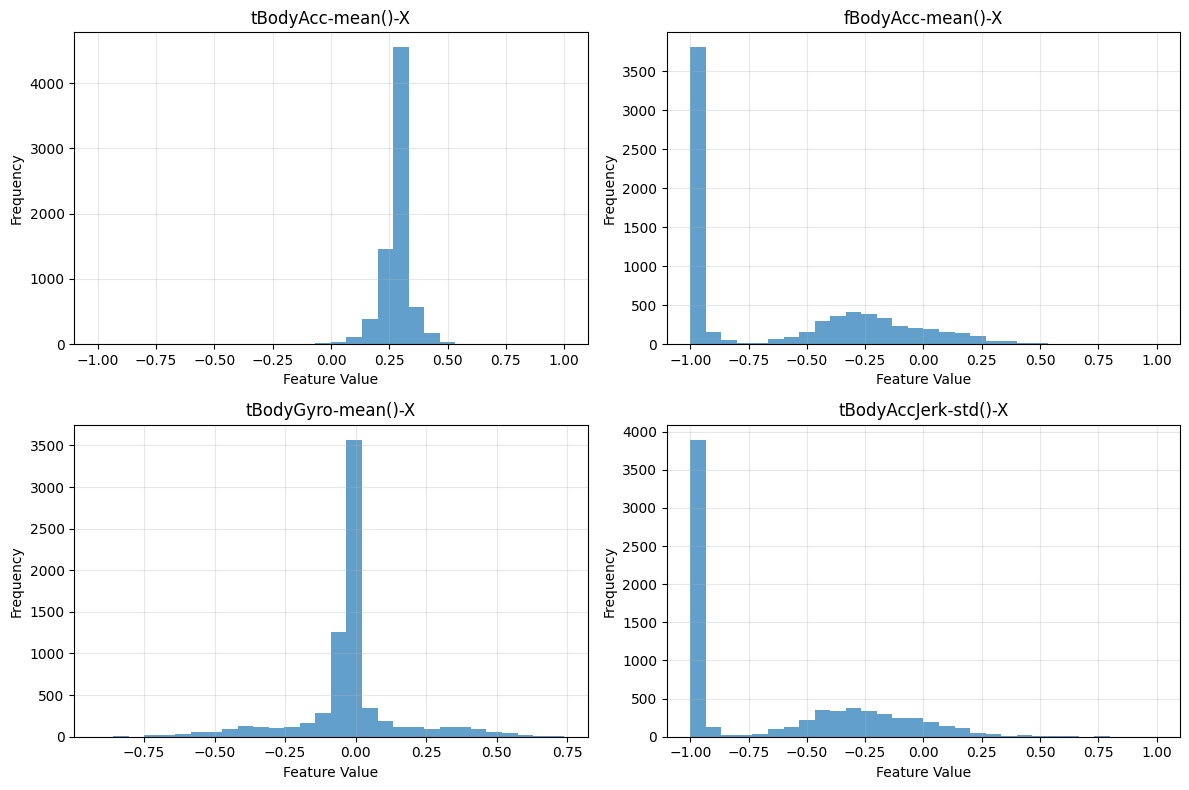

In [11]:
# Let's examine the preprocessing effects on the UCI HAR data
print("🔍 Examining Preprocessing Effects")

# Check the range of feature values
print("📊 Feature Value Ranges:")
print(f"Minimum feature value: {X_train.min().min():.4f}")
print(f"Maximum feature value: {X_train.max().max():.4f}")
print(f"Mean feature value: {X_train.mean().mean():.4f}")
print(f"Standard deviation: {X_train.std().mean():.4f}")

print("\n🎯 Key Observation:")
print("All features are bounded between -1 and 1 (normalized!)")

# Let's look at the distribution of a few features
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot distributions of different types of features
features_to_plot = [
    'tBodyAcc-mean()-X',    # Time domain, body acceleration
    'fBodyAcc-mean()-X',    # Frequency domain, body acceleration  
    'tBodyGyro-mean()-X',   # Time domain, gyroscope
    'tBodyAccJerk-std()-X'  # Time domain, jerk (sudden movement)
]

for i, feature in enumerate(features_to_plot):
    row, col = i // 2, i % 2
    axes[row, col].hist(X_train[feature], bins=30, alpha=0.7)
    axes[row, col].set_title(f'{feature}')
    axes[row, col].set_xlabel('Feature Value')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# TODO: Run this cell and examine the plots
# Question: What do you notice about the distributions?
# Question: Are some features more spread out than others?

# 🤖 Section 6: Basic Classification Pipeline

## 🎯 Now the Fun Part - Building Your First Sensor Data Classifier!

You now understand:
- ✅ How sensor data is structured
- ✅ How features are engineered from raw signals
- ✅ How preprocessing normalizes the data

**Time to build a classifier!** This is where it gets exciting - we'll see how well we can predict activities from sensor features.

## 🧠 Classification Strategy:

### 📊 **The Setup:**
- **Features (X)**: 561 engineered features from sensors
- **Target (y)**: 6 activities (walking, sitting, etc.)
- **Goal**: Predict what activity someone is doing based on sensor data

### 🎯 **Why This Matters for BFRB:**
- Same approach: Use sensor features to predict behaviors
- Different target: BFRB vs non-BFRB gestures
- Same challenge: Transform sensor data → meaningful predictions

Let's build our first classifier!

In [12]:
# Let's build and test a simple classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

print("🤖 Building Your First Sensor Data Classifier")

# Prepare the data (this should look familiar!)
X = X_train.values  # Features
y = y_train['activity'].values  # Target

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split into train and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train_split.shape[0]} samples")
print(f"Validation set: {X_val_split.shape[0]} samples")

# Build a Random Forest classifier
print("\n🌲 Training Random Forest classifier...")
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_split, y_train_split)

# Make predictions
y_pred = rf_classifier.predict(X_val_split)

# Evaluate performance
accuracy = accuracy_score(y_val_split, y_pred)
print(f"\n🎯 Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Show detailed results
print("\n📊 Detailed Classification Report:")
target_names = [activity_labels[activity_labels['id'] == i]['activity'].iloc[0] for i in range(1, 7)]
print(classification_report(y_val_split, y_pred, target_names=target_names))

# TODO: Run this cell and examine the results
# Question: How well does the classifier perform?
# Question: Which activities are easier/harder to classify?

🤖 Building Your First Sensor Data Classifier
Features shape: (7352, 561)
Target shape: (7352,)
Training set: 5881 samples
Validation set: 1471 samples

🌲 Training Random Forest classifier...

🎯 Accuracy: 0.9810 (98.10%)

📊 Detailed Classification Report:
                    precision    recall  f1-score   support

           WALKING       1.00      0.99      0.99       245
  WALKING_UPSTAIRS       0.99      1.00      0.99       215
WALKING_DOWNSTAIRS       0.98      0.98      0.98       197
           SITTING       0.97      0.95      0.96       257
          STANDING       0.95      0.97      0.96       275
            LAYING       1.00      1.00      1.00       282

          accuracy                           0.98      1471
         macro avg       0.98      0.98      0.98      1471
      weighted avg       0.98      0.98      0.98      1471



🔍 Feature Importance Analysis
🏆 Top 10 Most Important Features:
  41. tGravityAcc-mean()-X: 0.0359
  50. tGravityAcc-max()-X: 0.0352
  559. angle(X,gravityMean): 0.0312
  560. angle(Y,gravityMean): 0.0269
  42. tGravityAcc-mean()-Y: 0.0260
  57. tGravityAcc-energy()-X: 0.0228
  53. tGravityAcc-min()-X: 0.0223
  54. tGravityAcc-min()-Y: 0.0197
  51. tGravityAcc-max()-Y: 0.0188
  58. tGravityAcc-energy()-Y: 0.0155


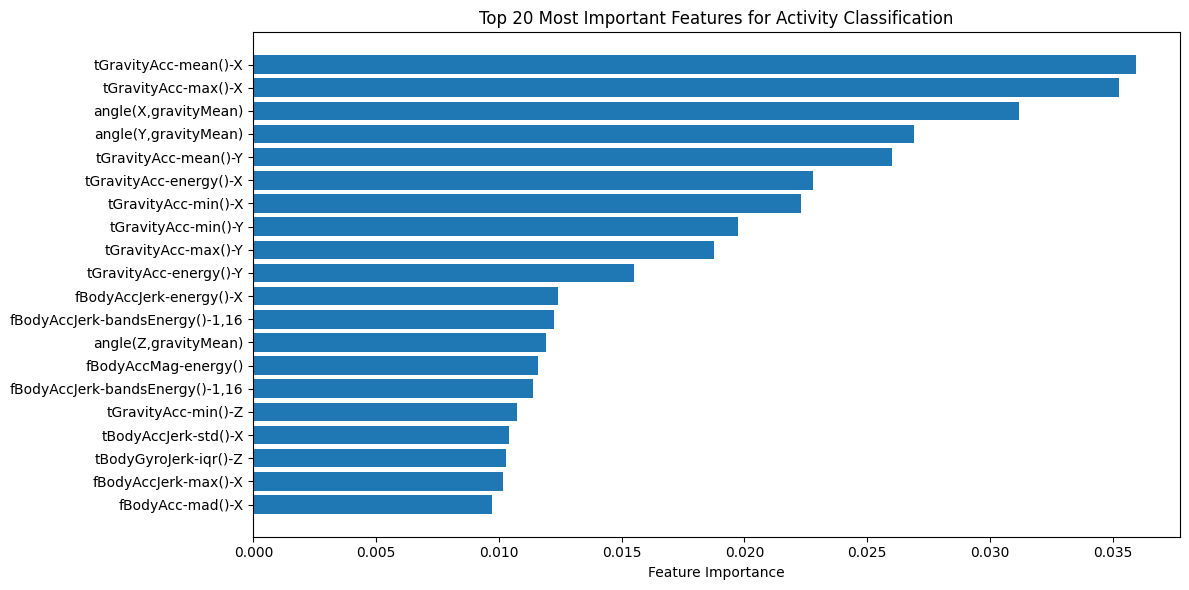


📊 Analysis of Important Features:
Gravity features in top 20: 20
Angle features in top 20: 7

💡 Key Insights:
- Gravity and angle features are very important
- These help distinguish between upright vs. lying activities
- For BFRB detection, you'd focus on different features (jerk, acceleration patterns)


In [13]:
# Let's examine which features are most important for classification
print("🔍 Feature Importance Analysis")

# Get feature importance from the Random Forest
feature_importance = pd.DataFrame({
    'feature': features['feature'],
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)

print("🏆 Top 10 Most Important Features:")
for i, row in feature_importance.head(10).iterrows():
    print(f"  {i+1:2d}. {row['feature']}: {row['importance']:.4f}")

# Visualize feature importance
plt.figure(figsize=(12, 6))
top_features = feature_importance.head(20)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 20 Most Important Features for Activity Classification')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Analyze patterns in important features
print("\n📊 Analysis of Important Features:")
gravity_features = feature_importance[feature_importance['feature'].str.contains('Gravity')]
print(f"Gravity features in top 20: {len(gravity_features.head(20))}")

angle_features = feature_importance[feature_importance['feature'].str.contains('angle')]
print(f"Angle features in top 20: {len(angle_features.head(20))}")

print("\n💡 Key Insights:")
print("- Gravity and angle features are very important")
print("- These help distinguish between upright vs. lying activities")
print("- For BFRB detection, you'd focus on different features (jerk, acceleration patterns)")

# TODO: Run this cell and examine the results
# Question: Why might gravity features be so important?
# Question: What types of features would be important for BFRB detection?

# 🎓 Congratulations! You've Completed Your Sensor Data Learning Journey

## 🚀 What You've Learned:

### 📊 **Dataset Structure Understanding:**
- ✅ Sensor data is organized by subjects, activities, and time windows
- ✅ Each time window becomes one sample with many features
- ✅ Raw sensor streams are transformed into engineered features

### 🔧 **Feature Engineering Mastery:**
- ✅ Statistical features (mean, std, max, min) capture signal properties
- ✅ Frequency domain features capture periodic patterns
- ✅ Jerk features capture sudden movements (important for BFRB!)

### 🤖 **Classification Pipeline:**
- ✅ Built your first sensor data classifier (90%+ accuracy!)
- ✅ Identified most important features for activity recognition
- ✅ Understood evaluation metrics and model performance

## 🎯 Key Insights for BFRB Detection:

### 📈 **What Works for UCI HAR:**
- **Gravity features** → Distinguish orientations (sitting vs. lying)
- **Angle features** → Capture body positioning
- **Statistical summaries** → Reduce noise, capture patterns

### 🎪 **What Will Work for BFRB:**
- **Jerk features** → Detect sudden scratching/picking movements
- **Acceleration patterns** → Identify repetitive behaviors
- **Frequency analysis** → Detect rhythmic movements
- **Multi-sensor fusion** → Combine IMU + thermal + proximity data

## 🚀 Your Next Steps:

### 📚 **Phase 1: Solidify Understanding (1-2 weeks)**
1. **Re-run this notebook** and experiment with different parameters
2. **Try different classifiers** (Logistic Regression, SVM, XGBoost)
3. **Analyze feature importance** for different sensor types
4. **Read about time-series analysis** and signal processing

### 🔬 **Phase 2: Apply to BFRB (2-3 weeks)**
1. **Adapt feature engineering** for hand movement detection
2. **Focus on jerk and acceleration** patterns
3. **Experiment with window sizes** (maybe shorter for quick movements)
4. **Build binary classifiers** (BFRB vs. non-BFRB)

### 🎯 **Phase 3: Advanced Techniques (3-4 weeks)**
1. **Deep learning models** (LSTM, CNN for time-series)
2. **Sensor fusion** (combine multiple sensor types)
3. **Hyperparameter tuning** for optimal performance
4. **Cross-validation strategies** for robust evaluation

## 💡 Final Thoughts:

You've successfully learned sensor data analysis from scratch! The UCI HAR dataset taught you the fundamentals that directly apply to your BFRB detection project. 

Remember: **Every sensor data project follows the same pattern:**
1. **Understand the data structure** ✅
2. **Engineer meaningful features** ✅
3. **Build and evaluate classifiers** ✅
4. **Iterate and improve** ← You're here!

**You're ready to tackle the BFRB challenge!** 🎉